# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [40]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [98]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | ust-nera
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | port sudan
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | labytnangi
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | cardigan
Processing Record 13 of Set 1 | uturoa
Processing Record 14 of Set 1 | markovo
Processing Record 15 of Set 1 | naze
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | bowling green
Processing Record 18 of Set 1 | yeniseysk
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | nykvarn
Processing Record 22 of Set 1 | port alfred
Processing Record 23

In [104]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [106]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,13.83,83,20,6.80,CL,1742168054
1,ust-nera,64.5667,143.2000,-27.12,91,57,1.29,RU,1742168055
2,ribeira grande,38.5167,-28.7000,15.22,72,40,7.72,PT,1742168058
3,ushuaia,-54.8000,-68.3000,12.81,58,75,2.57,AR,1742168031
4,longyearbyen,78.2186,15.6401,-19.09,65,40,2.57,SJ,1742168060


In [108]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [110]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,13.83,83,20,6.80,CL,1742168054
1,ust-nera,64.5667,143.2000,-27.12,91,57,1.29,RU,1742168055
2,ribeira grande,38.5167,-28.7000,15.22,72,40,7.72,PT,1742168058
3,ushuaia,-54.8000,-68.3000,12.81,58,75,2.57,AR,1742168031
4,longyearbyen,78.2186,15.6401,-19.09,65,40,2.57,SJ,1742168060


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

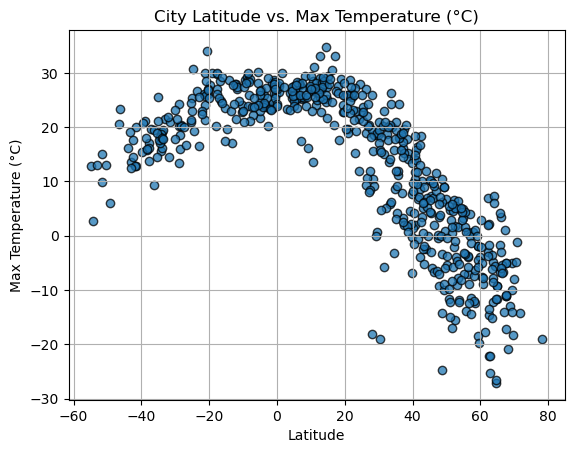

In [113]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

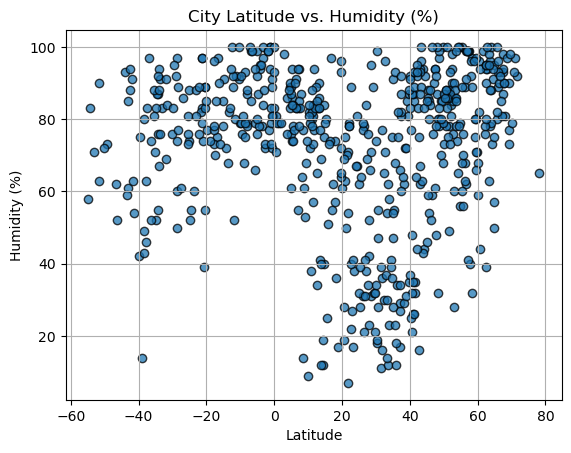

In [118]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

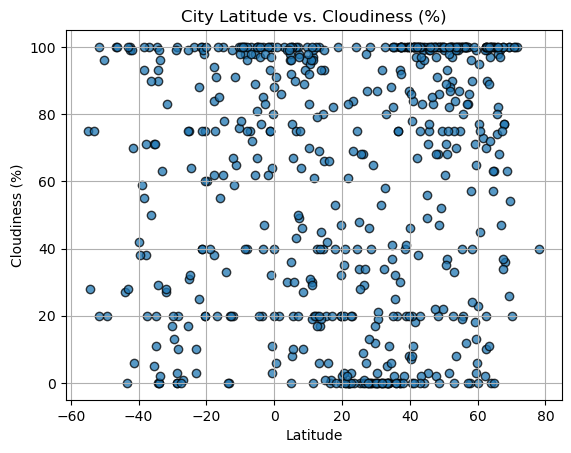

In [120]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

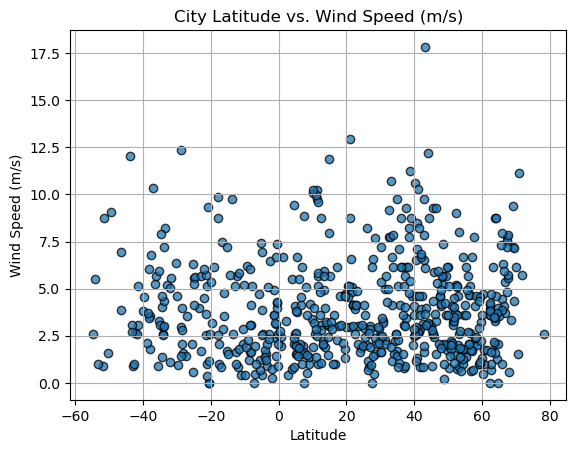

In [122]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [129]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere):
    """Performs linear regression and plots a scatter plot with regression line."""
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    
     # Compute regression values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Create scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x_values, y_values, edgecolor="black")
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    
    # Labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{title} ({hemisphere})")
    plt.legend()
    
    # Show r-squared value
    print(f"{title} ({hemisphere}) -> r² = {rvalue**2:.3f}")
    
    # Show plot
    plt.show()

In [133]:
# Convert city data to a DataFrame
weather_df = pd.DataFrame(city_data)

# Display the data
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,13.83,83,20,6.80,CL,1742168054
1,ust-nera,64.5667,143.2000,-27.12,91,57,1.29,RU,1742168055
2,ribeira grande,38.5167,-28.7000,15.22,72,40,7.72,PT,1742168058
3,ushuaia,-54.8000,-68.3000,12.81,58,75,2.57,AR,1742168031
4,longyearbyen,78.2186,15.6401,-19.09,65,40,2.57,SJ,1742168060


In [135]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = weather_df[weather_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,ust-nera,64.5667,143.2000,-27.12,91,57,1.29,RU,1742168055
2,ribeira grande,38.5167,-28.7000,15.22,72,40,7.72,PT,1742168058
4,longyearbyen,78.2186,15.6401,-19.09,65,40,2.57,SJ,1742168060
5,port sudan,19.6175,37.2164,24.04,72,0,4.73,SD,1742168061
6,kodiak,57.7900,-152.4072,0.73,40,0,7.72,US,1742168062


In [137]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = weather_df[weather_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,13.83,83,20,6.80,CL,1742168054
3,ushuaia,-54.8000,-68.3000,12.81,58,75,2.57,AR,1742168031
10,puerto ayora,-0.7393,-90.3518,28.64,91,64,3.13,EC,1742168067
12,uturoa,-16.7333,-151.4333,28.48,75,20,7.46,PF,1742168070
19,port elizabeth,-33.9180,25.5701,19.16,94,0,7.20,ZA,1742168079


###  Temperature vs. Latitude Linear Regression Plot

r² = 0.759


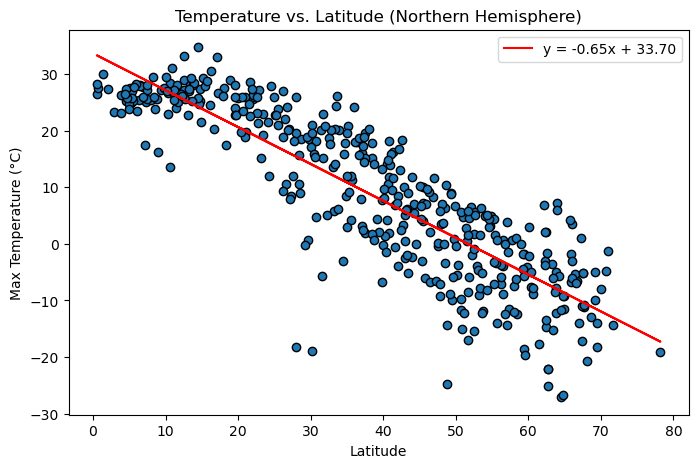

In [142]:
# Linear regression on Northern Hemisphere
# Define variables
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression using NumPy
slope, intercept = np.polyfit(x_values, y_values, 1)

# Calculate regression values
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(x_values, y_values, edgecolor="black")
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Temperature vs. Latitude (Northern Hemisphere)")
plt.legend()

# Calculate r-squared value using NumPy
correlation_matrix = np.corrcoef(x_values, y_values)
r_squared = correlation_matrix[0, 1]**2
print(f"r² = {r_squared:.3f}")

plt.show()


r² = 0.533


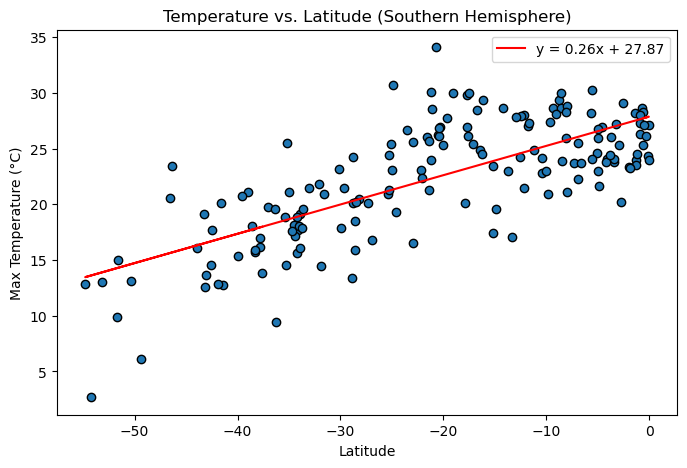

In [144]:
# Linear regression on Southern Hemisphere
# Define variables
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression using NumPy
slope, intercept = np.polyfit(x_values, y_values, 1)

# Calculate regression values
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(x_values, y_values, edgecolor="black")
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Temperature vs. Latitude (Southern Hemisphere)")
plt.legend()

# Calculate r-squared value using NumPy
correlation_matrix = np.corrcoef(x_values, y_values)
r_squared = correlation_matrix[0, 1]**2
print(f"r² = {r_squared:.3f}")

plt.show()

### Humidity vs. Latitude Linear Regression Plot

r² = 0.062


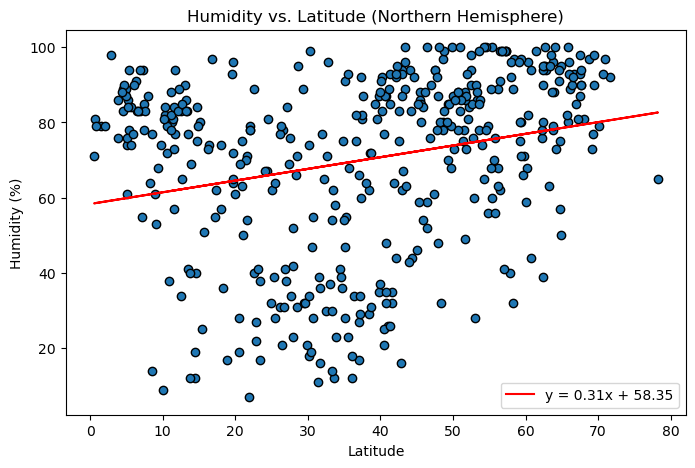

In [148]:
# Northern Hemisphere
# Define variables
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression using NumPy
slope, intercept = np.polyfit(x_values, y_values, 1)

# Calculate regression values
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(x_values, y_values, edgecolor="black")
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude (Northern Hemisphere)")
plt.legend()

# Calculate r-squared value using NumPy
correlation_matrix = np.corrcoef(x_values, y_values)
r_squared = correlation_matrix[0, 1]**2
print(f"r² = {r_squared:.3f}")

plt.show()

r² = 0.157


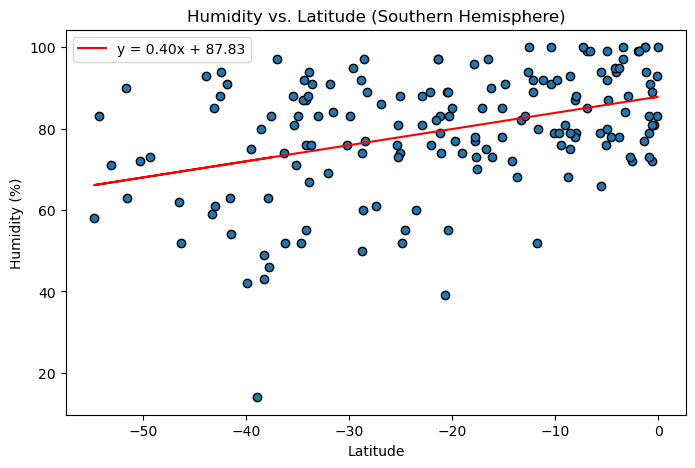

In [150]:
# Southern Hemisphere
# Define variables
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression using NumPy
slope, intercept = np.polyfit(x_values, y_values, 1)

# Calculate regression values
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(x_values, y_values, edgecolor="black")
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude (Southern Hemisphere)")
plt.legend()

# Calculate r-squared value using NumPy
correlation_matrix = np.corrcoef(x_values, y_values)
r_squared = correlation_matrix[0, 1]**2
print(f"r² = {r_squared:.3f}")

plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

r² = 0.046


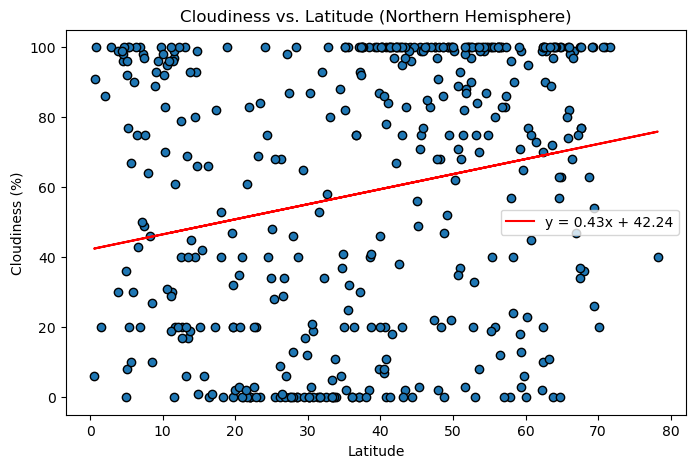

In [152]:
# Northern Hemisphere
# Define variables
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression using NumPy
slope, intercept = np.polyfit(x_values, y_values, 1)

# Calculate regression values
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(x_values, y_values, edgecolor="black")
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Latitude (Northern Hemisphere)")
plt.legend()

# Calculate r-squared value using NumPy
correlation_matrix = np.corrcoef(x_values, y_values)
r_squared = correlation_matrix[0, 1]**2
print(f"r² = {r_squared:.3f}")

plt.show()


r² = 0.043


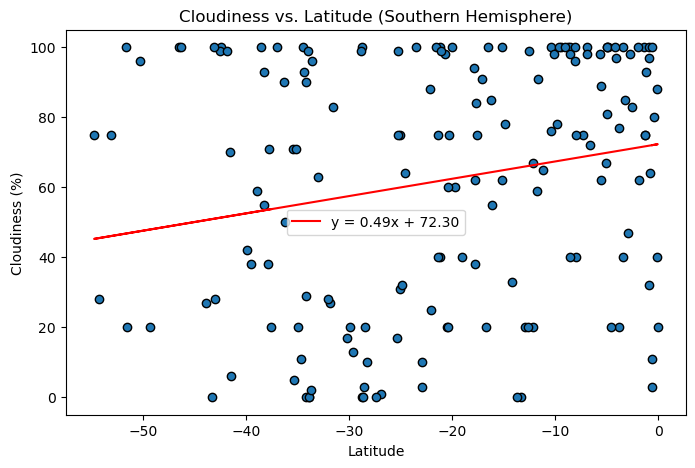

In [154]:
# Southern Hemisphere
# Define variables
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression using NumPy
slope, intercept = np.polyfit(x_values, y_values, 1)

# Calculate regression values
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(x_values, y_values, edgecolor="black")
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Latitude (Southern Hemisphere)")
plt.legend()

# Calculate r-squared value using NumPy
correlation_matrix = np.corrcoef(x_values, y_values)
r_squared = correlation_matrix[0, 1]**2
print(f"r² = {r_squared:.3f}")

plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

r² = 0.001


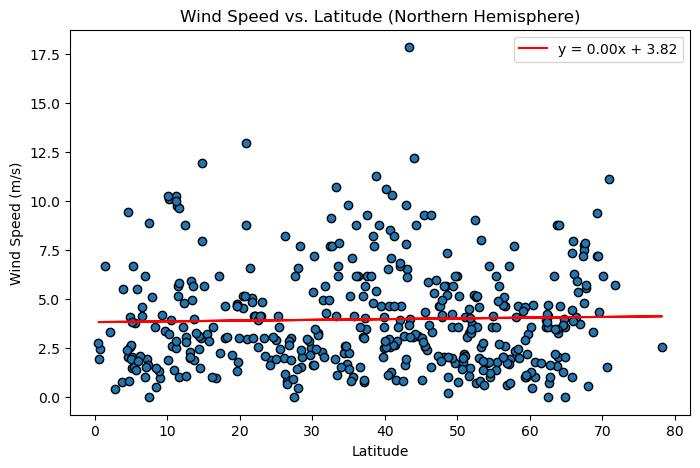

In [156]:
# Northern Hemisphere
# Define variables
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression using NumPy
slope, intercept = np.polyfit(x_values, y_values, 1)

# Calculate regression values
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(x_values, y_values, edgecolor="black")
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs. Latitude (Northern Hemisphere)")
plt.legend()

# Calculate r-squared value using NumPy
correlation_matrix = np.corrcoef(x_values, y_values)
r_squared = correlation_matrix[0, 1]**2
print(f"r² = {r_squared:.3f}")

plt.show()

r² = 0.036


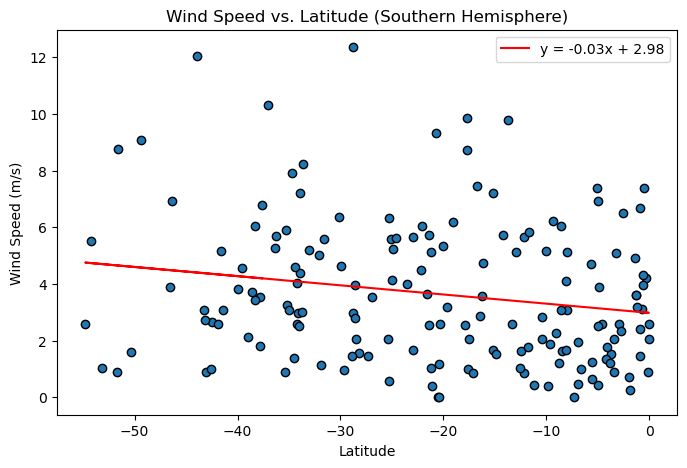

In [158]:
# Southern Hemisphere
# Define variables
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression using NumPy
slope, intercept = np.polyfit(x_values, y_values, 1)

# Calculate regression values
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(x_values, y_values, edgecolor="black")
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs. Latitude (Southern Hemisphere)")
plt.legend()

# Calculate r-squared value using NumPy
correlation_matrix = np.corrcoef(x_values, y_values)
r_squared = correlation_matrix[0, 1]**2
print(f"r² = {r_squared:.3f}")

plt.show()